In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import scale
from imblearn.under_sampling import RandomUnderSampler
import pip
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

/Users/kkk/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/kkk/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df = pd.read_csv('telco-customer-churn.csv', sep=',')

In [3]:
df.nunique()

age                                       68
annualincome                            9508
calldroprate                               8
callfailurerate                            4
callingnum                              9525
customerid                              9525
customersuspended                          2
education                                  4
gender                                     2
homeowner                                  2
maritalstatus                              2
monthlybilledamount                      120
noadditionallines                          1
numberofcomplaints                         4
numberofmonthunpaid                        8
numdayscontractequipmentplanexpiring     100
occupation                                 3
penaltytoswitch                          500
state                                     50
totalminsusedinlastmonth                 500
unpaidbalance                            250
usesinternetservice                        2
usesvoices

In [4]:
df = df.drop(columns=['noadditionallines', 'year'], index=None)

In [5]:
df.head()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,state,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,month
0,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,WA,15,19,No,No,0.82,5971,663,0,1
1,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,WA,15,19,No,No,0.82,3981,995,0,2
2,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,WI,212,34,No,Yes,0.27,7379,737,0,1
3,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,WI,212,34,No,Yes,0.27,1729,432,0,2
4,58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,...,KS,216,144,No,No,0.48,3122,624,0,1


## 1. Соотношение числа абонентов по классам оттока

Проанализируем соотношения абонентов по индикаторам оттока. Заметим, что наши классы несбалансированы:

Churn: 0 - 42.0%
Churn: 1 - 4.0%


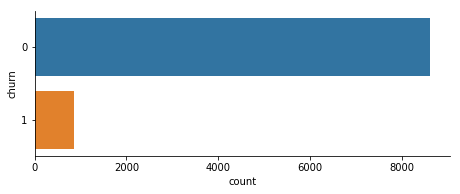

In [6]:
# В первом месяце
df_m_1 = df[df['month'] == 1]
ax = sns.catplot(y="churn", kind="count", data=df_m_1, height=2.6, aspect=2.5, orient='h')

print('Churn: 0 - {}%'.format(round(df_m_1['churn'].value_counts()[0]/len(df)*100)))
print('Churn: 1 - {}%'.format(round(df_m_1['churn'].value_counts()[1]/len(df)*100)))

Churn: 0 - 91.0%
Churn: 1 - 9.0%


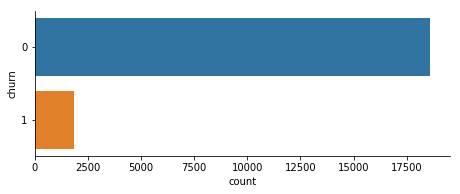

In [7]:
# За 3 месяца
ax = sns.catplot(y="churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

print('Churn: 0 - {}%'.format(round(df['churn'].value_counts()[0]/len(df)*100)))
print('Churn: 1 - {}%'.format(round(df['churn'].value_counts()[1]/len(df)*100)))

## 2. Распредление индикатора оттока в различных признаках абонентов

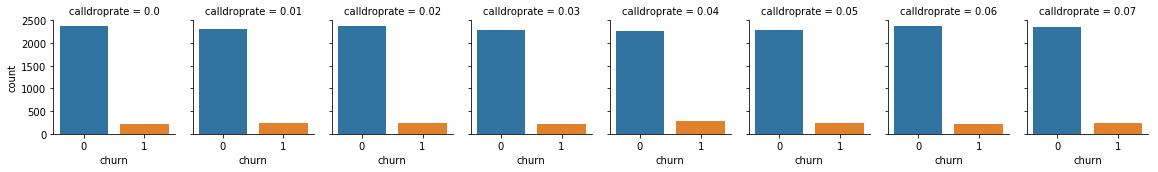

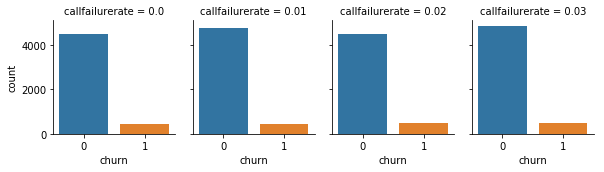

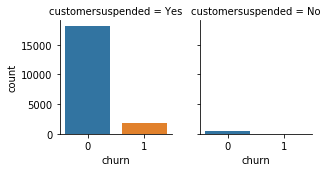

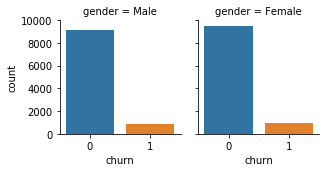

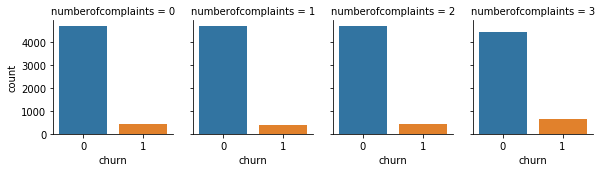

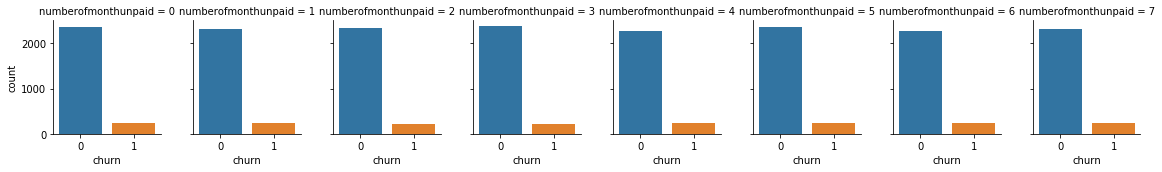

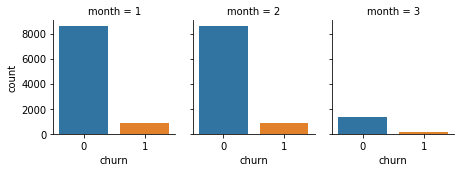

In [8]:
col_list = [ 'calldroprate', 'callfailurerate', 'customersuspended', 'gender', 'numberofcomplaints', \
            'numberofmonthunpaid', 'month']

for col in col_list:
    sns.catplot("churn", col=col, col_wrap=8,
                     data=df[[col, 'churn']],
                     kind="count", height=2.5, aspect=.8)

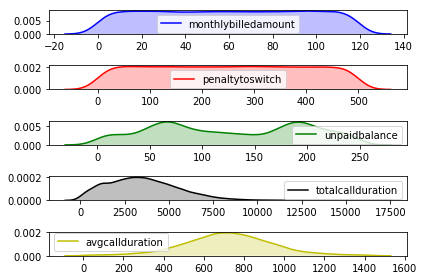

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
sns.kdeplot(df["monthlybilledamount"], shade=True, color="b",ax = ax1)
sns.kdeplot(df["penaltytoswitch"], shade=True, color="r", ax = ax2)
sns.kdeplot(df["unpaidbalance"], shade=True, color="g", ax = ax3)
sns.kdeplot(df["totalcallduration"], shade=True, color="k", ax = ax4)
sns.kdeplot(df["avgcallduration"], shade=True, color="y", ax = ax5)

fig.tight_layout()
plt.show(fig)

## 3. Стандартизация данных

In [10]:
columns_int = list(df.select_dtypes(include=['int']))
columns_float = list(df.select_dtypes(include=['float']))

In [11]:
columns_num = ['age',
 'annualincome','monthlybilledamount','numberofcomplaints','numberofmonthunpaid',
 'numdayscontractequipmentplanexpiring','penaltytoswitch','totalminsusedinlastmonth','unpaidbalance',
 'totalcallduration','avgcallduration','calldroprate', 'callfailurerate', 'percentagecalloutsidenetwork']

In [12]:
df[columns_num].head()

,age,annualincome,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,unpaidbalance,totalcallduration,avgcallduration,calldroprate,callfailurerate,percentagecalloutsidenetwork
0,12,168147,71,0,7,96,371,15,19,5971,663,0.06,0.00,0.82
1,12,168147,71,0,7,96,371,15,19,3981,995,0.06,0.00,0.82
2,42,29047,8,1,4,14,43,212,34,7379,737,0.05,0.01,0.27
3,42,29047,8,1,4,14,43,212,34,1729,432,0.05,0.01,0.27
4,58,27076,16,0,2,55,403,216,144,3122,624,0.07,0.02,0.48


In [13]:
columns_encode = list(df.select_dtypes(include=['category','object']))

for col_encode in columns_encode:
    dummies = pd.get_dummies(df[col_encode])
    one_hot_col_names = []
    for col_name in list(dummies.columns):
        one_hot_col_names.append(col_encode + '_' + col_name)
    dummies.columns = one_hot_col_names
    df = df.drop(col_encode, axis=1)
    df = df.join(dummies)

In [14]:
col_new = list(df.columns)
col_new.remove('churn')
col_new.append('churn')

df = df[col_new]

In [15]:
df_corr = pd.DataFrame()
df_corr['churn'] = df[df.columns[:-1]].corrwith(df['churn'])

In [16]:
df_corr.sort_values(by=['churn'], ascending=False)[:5]

,churn
numberofcomplaints,0.054646
unpaidbalance,0.047482
state_SC,0.033248
state_CA,0.025664
maritalstatus_Single,0.019097


## 4. Создание тренировочного и тестового сета, балансировка классов

Cоздадим тренировочные и тестовые данные. Далее, чтобы сбалансировать классы, мы можем применить методы oversampling, либо undersampling. Рассмотрим первый метод. Стандартизуем числовые данные.

In [17]:
pred_test_valid = df.drop(columns=['callingnum','customerid', 'month'])
pred_test_valid = pred_test_valid.reset_index(drop=True)
pred_test_valid[columns_num] = scale(pred_test_valid[columns_num])

y = np.array(pred_test_valid['churn'])
X = np.array(pred_test_valid.drop('churn', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train,y_train)

In [23]:
pred_test_valid.head()

,age,annualincome,calldroprate,callfailurerate,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,...,state_VT,state_WA,state_WI,state_WV,state_WY,usesinternetservice_No,usesinternetservice_Yes,usesvoiceservice_No,usesvoiceservice_Yes,churn
0,-1.698643,0.605873,1.086237,-1.359076,0.328114,-1.339590,1.533289,1.615090,0.847229,-1.627943,...,0,1,0,0,0,1,0,1,0,0
1,-1.698643,0.605873,1.086237,-1.359076,0.328114,-1.339590,1.533289,1.615090,0.847229,-1.627943,...,0,1,0,0,0,1,0,1,0,0
2,-0.169910,-1.322653,0.651368,-0.467230,-1.489972,-0.446035,0.223065,-1.224891,-1.426701,-0.261733,...,0,0,1,0,0,1,0,0,1,0
3,-0.169910,-1.322653,0.651368,-0.467230,-1.489972,-0.446035,0.223065,-1.224891,-1.426701,-0.261733,...,0,0,1,0,0,1,0,0,1,0
4,0.645414,-1.349979,1.521105,0.424616,-1.259104,-1.339590,-0.650418,0.195099,1.069075,-0.233993,...,0,0,0,0,0,1,0,1,0,0


## 5. Обучение моделей

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import average_precision_score

def selection_of_parameters(classifier,params):
    return GridSearchCV(estimator=classifier, param_grid=params, cv=5)

def classification(model):
    model_fit = model.fit(X_train, y_train)
    y_pred=model_fit.predict_proba(X_test)[:,1]
    y_pred_2 = model_fit.predict(X_test)
    return y_pred, y_pred_2

#график Precision-Recall    
def pr_rec(X_test, y_test, preds, y_pred_2):
    #preds = clf_alg.predict_proba(X_test)[:,1]
    average_precision = average_precision_score(y_test, y_pred_2)
    precision, recall, _ = precision_recall_curve(y_test, preds)
    
    print ("\n Classification report : \n",classification_report(y_test, y_pred_2))
    
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

### Линейная регрессия

In [46]:
lr  = LogisticRegression()
params_lr = {'penalty': ['l1','l2'], 'C': [1,10,100,1000]}
model_lr = selection_of_parameters(lr,params_lr)
y_pred, y_pred_2 =  classification(model_lr)

/Users/kkk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/kkk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/kkk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/kkk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/kkk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/kkk/anac


 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.62      0.75      4662
           1       0.13      0.60      0.22       455

    accuracy                           0.62      5117
   macro avg       0.54      0.61      0.48      5117
weighted avg       0.87      0.62      0.70      5117



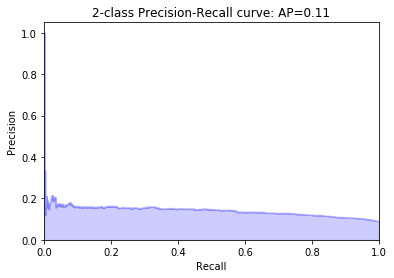

In [47]:
target_names = ['class 0', 'class 1']
pr_rec(X_test, y_test, y_pred, y_pred_2)

### Случайные леса

In [48]:
rfc = RandomForestClassifier()
params_rfc = {'n_estimators': (5,10,15,20,30,50),
'max_depth': (None,10,20,30,40),
'min_samples_split': (3,2,5,10)}
model_rfc = selection_of_parameters(rfc,params_rfc)
y_pred, y_pred_2 =  classification(model_rfc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      4662
           1       1.00      0.70      0.82       455

    accuracy                           0.97      5117
   macro avg       0.99      0.85      0.90      5117
weighted avg       0.97      0.97      0.97      5117



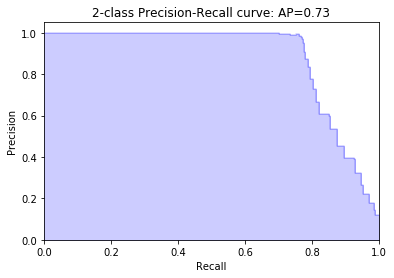

In [49]:
target_names = ['class 0', 'class 1']
pr_rec(X_test, y_test, y_pred, y_pred_2)

### k-лижайших соседей

In [50]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': (5,10,15),'weights': ('uniform','distance'),
              'algorithm' : ('ball_tree', 'kd_tree', 'brute', 'auto')}
model_knn = selection_of_parameters(knn,params_knn)
y_pred, y_pred_2 =  classification(model_knn)


 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      4662
           1       0.27      0.87      0.41       455

    accuracy                           0.78      5117
   macro avg       0.63      0.82      0.63      5117
weighted avg       0.92      0.78      0.82      5117



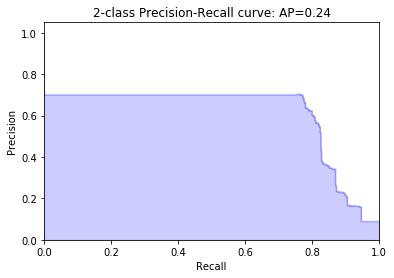

In [51]:
target_names = ['class 0', 'class 1']
pr_rec(X_test, y_test, y_pred, y_pred_2)

### Дерево решений

In [52]:
dtclf = DecisionTreeClassifier()
params_dtclf = {'criterion':('gini','entropy'),'splitter' : ('best', 'random'),
                'max_depth': (10,15,20,30,40,50),
                'min_samples_split' : (5,10,15,20)}
model_dtclf = selection_of_parameters(dtclf,params_dtclf)
y_pred, y_pred_2 =  classification(model_dtclf)


 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      4662
           1       0.72      0.75      0.73       455

    accuracy                           0.95      5117
   macro avg       0.85      0.86      0.85      5117
weighted avg       0.95      0.95      0.95      5117



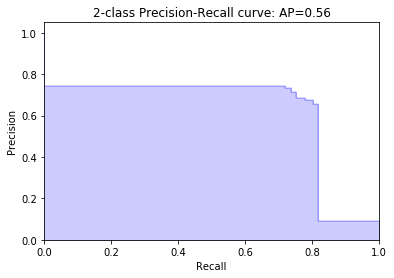

In [53]:
target_names = ['class 0', 'class 1']
pr_rec(X_test, y_test, y_pred, y_pred_2)

### Градиентный бустинг

In [55]:
gbclf = GradientBoostingClassifier()
parama_gbclf = {'n_estimators':range(20,81,10),'max_depth':(1,2,4,6),
                'min_samples_split':(10,20,30,40)}
model_gbclf = selection_of_parameters(gbclf,parama_gbclf)
y_pred, y_pred_2 =  classification(model_gbclf)


 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4662
           1       0.51      0.23      0.32       455

    accuracy                           0.91      5117
   macro avg       0.72      0.61      0.64      5117
weighted avg       0.89      0.91      0.90      5117



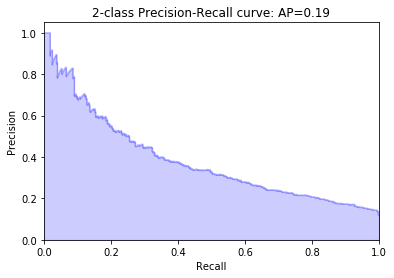

In [56]:
target_names = ['class 0', 'class 1']
pr_rec(X_test, y_test, y_pred, y_pred_2)

В данной задаче классы были не сбалансированными, поэтому в критерием качества алгоритмов был выбран способ определения площади под PR-кривой. Исходя из построенных графиков, в качестве алгоритма предсказания оттока выберем классификатор Random forest